In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df=pd.read_csv("../input/heart-failure-prediction/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
labelenc=LabelEncoder()
coloum_list=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
x={}
for col in coloum_list:
    data=df[col].to_numpy()
    encode=labelenc.fit_transform(data.reshape(-1,1))
    x[col]=encode

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
encoded_x=pd.DataFrame.from_dict(x)
numerical_list=['Age', 'RestingBP', 'Cholesterol', 'FastingBS',
    'MaxHR', 'Oldpeak']
for col in numerical_list:
    encoded_x[col]=df[col]

In [6]:
encoded_x.corr()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Sex,1.000000,-0.126559,0.071552,0.190664,-0.150693,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734
ChestPainType,-0.126559,1.000000,-0.072537,-0.354727,0.213521,-0.077150,-0.020647,0.067880,-0.073151,0.289123,-0.177377
RestingECG,0.071552,-0.072537,1.000000,0.077500,-0.006778,-0.007484,0.022656,-0.196544,0.087050,-0.179276,-0.020438
ExerciseAngina,0.190664,-0.354727,0.077500,1.000000,-0.428706,0.215793,0.155101,-0.034166,0.060451,-0.370425,0.408752
ST_Slope,-0.150693,0.213521,-0.006778,-0.428706,1.000000,-0.268264,-0.075162,0.111471,-0.175774,0.343419,-0.501921
Age,0.055750,-0.077150,-0.007484,0.215793,-0.268264,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612
RestingBP,0.005133,-0.020647,0.022656,0.155101,-0.075162,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803
Cholesterol,-0.200092,0.067880,-0.196544,-0.034166,0.111471,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148
FastingBS,0.120076,-0.073151,0.087050,0.060451,-0.175774,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698
MaxHR,-0.189186,0.289123,-0.179276,-0.370425,0.343419,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691


In [7]:
X=encoded_x[["Age","Sex","MaxHR","ChestPainType","ST_Slope","Cholesterol"]].to_numpy()
Y=df['HeartDisease'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=124)

In [10]:
x_train=(x_train-x_train.min())/(x_train.max()-x_train.min())
x_test=(x_test-x_test.min())/(x_test.max()-x_test.min())

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# **Logistc Regression**

In [12]:
logR=LogisticRegression()
logR.fit(x_train,y_train)

LogisticRegression()

In [13]:
proba=logR.predict(x_test)
print(y_test)
print(proba)

[0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0
 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1]
[0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1]


In [14]:
accuray=(proba==y_test)
accuray.mean()

0.6793478260869565

In [15]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn

In [16]:
svc=SVC(kernel='poly',degree=10,probability=True)
svc.fit(x_train,y_train)

SVC(degree=10, kernel='poly', probability=True)

In [17]:
pred=svc.predict(x_test)
prob=svc.predict_proba(x_test)
print(pred)


[0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1]


<AxesSubplot:>

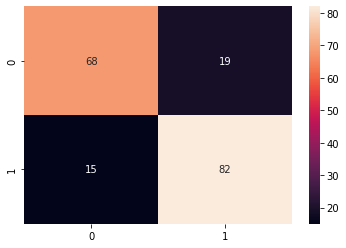

In [18]:
con=confusion_matrix(y_test,pred)
seaborn.heatmap(con,annot=True)

In [19]:
accuray=(pred==y_test)
accuray.mean()

0.8152173913043478

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dctree=DecisionTreeClassifier(max_depth=2)
dctree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [22]:
pred=dctree.predict(x_test)
accuray=(pred==y_test)
accuray.mean()

0.8260869565217391

<AxesSubplot:>

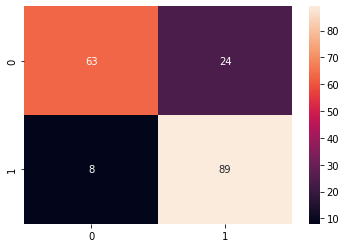

In [23]:
con=confusion_matrix(y_test,pred)
seaborn.heatmap(con,annot=True)